# EDA Sleep Health

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 01. 데이터 수집 및 로드

In [2]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 02. 데이터 구조 및 변수 이해

In [3]:
print(df.shape) # 891행 12열
print(df.dtypes)
print()
df.info()

(374, 13)
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non

## 03. 데이터 요약 및 기술통계

In [4]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [5]:
print(df.value_counts('Person ID'), end='\n\n')
print(df.value_counts('Gender'), end='\n\n')
print(df.value_counts('Age'), end='\n\n')
print(df.value_counts('Occupation'), end='\n\n')
print(df.value_counts('Sleep Duration'), end='\n\n')
print(df.value_counts('Quality of Sleep'), end='\n\n')
print(df.value_counts('Physical Activity Level'), end='\n\n')
print(df.value_counts('Stress Level'), end='\n\n')
print(df.value_counts('BMI Category'), end='\n\n')
print(df.value_counts('Blood Pressure'), end='\n\n')
print(df.value_counts('Heart Rate'), end='\n\n')
print(df.value_counts('Daily Steps'), end='\n\n')
print(df.value_counts('Sleep Disorder'), end='\n\n')

Person ID
374    1
1      1
2      1
3      1
4      1
      ..
26     1
27     1
28     1
29     1
30     1
Name: count, Length: 374, dtype: int64

Gender
Male      189
Female    185
Name: count, dtype: int64

Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
29    13
30    13
36    12
35    12
41    12
49    11
42     9
57     9
52     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
34     2
56     2
27     1
Name: count, dtype: int64

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
8.4    14
7.3    14
8.5    13
8.0    13

## 04. 결측치, 이상치 탐지(혈압, 수면장애 - 무호흡증, 불면증)

In [6]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
# df.duplicated('PassengerId').sum()

In [8]:
# df['Age'].plot(kind='box')
# plt.show()

## 05. 변수분포 시각화

### 1) Scatterplot

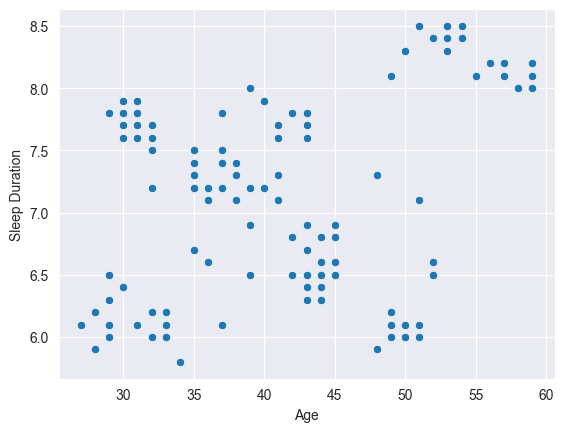

In [9]:
sns.scatterplot(data=df, x='Age', y='Sleep Duration')
plt.show()
# 나이에 따른 수면 시간 확인

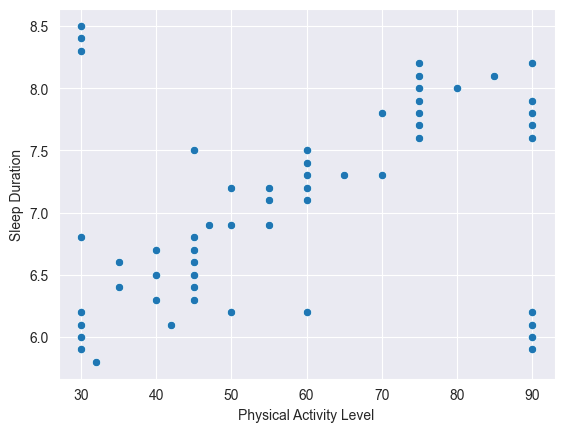

In [10]:
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.show()
# 활동량이 수면 시간과의 상관관계 확인

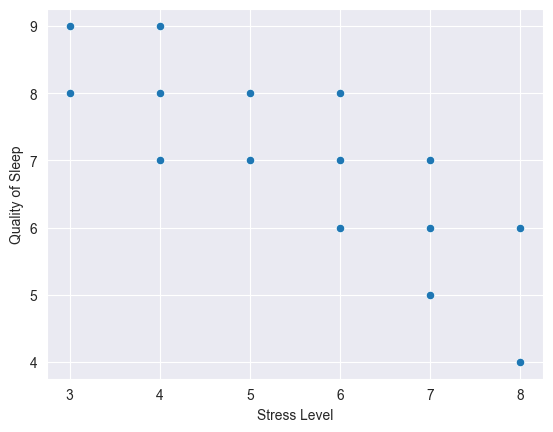

In [11]:
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep')
plt.show()
# 스트레스가 수면의 질에 미치는 영향

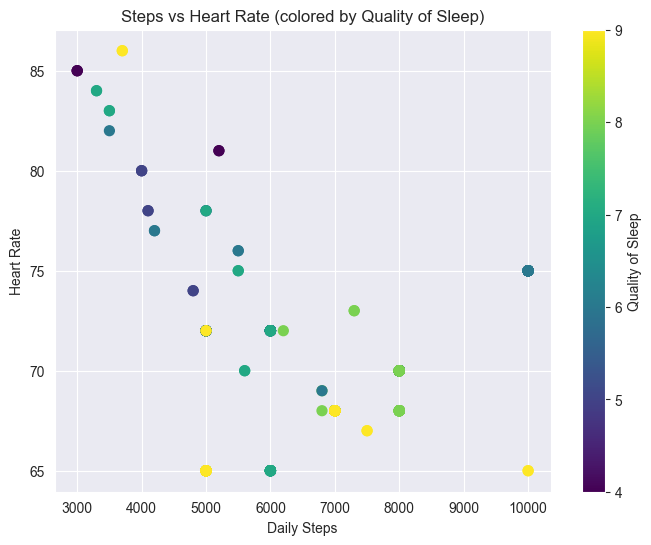

In [12]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Daily Steps'], df['Heart Rate'],
                      c=df['Quality of Sleep'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Quality of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate')
plt.title('Steps vs Heart Rate (colored by Quality of Sleep)')
plt.show()

# 심장박동과 일일 걸음수가 수면의 질에 끼치는 영향

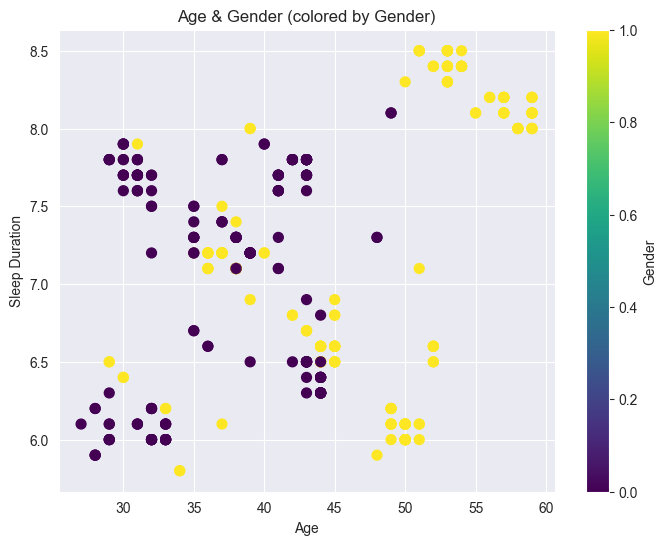

In [13]:
df['Gender_code'] = df['Gender'].map({'Male': 0, 'Female': 1})

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Age'], df['Sleep Duration'],
                      c=df['Gender_code'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Age & Gender (colored by Gender)')
plt.show()
# 나이, 성별에 따른 수면시간 비교

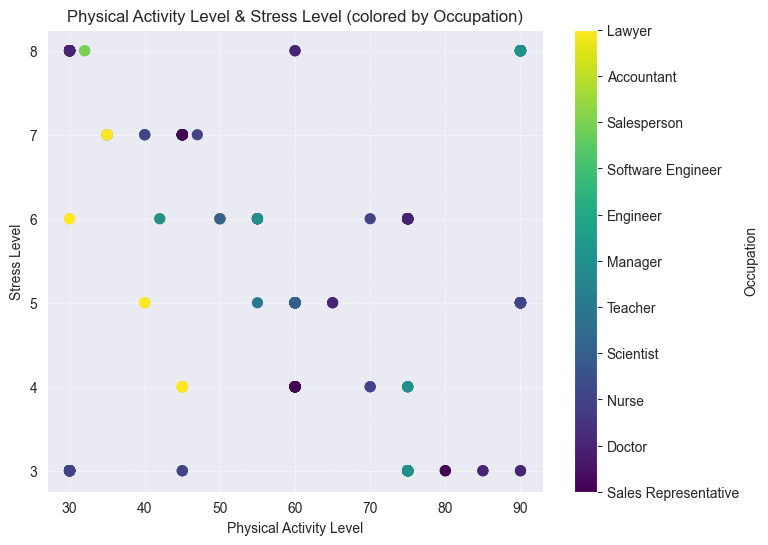

In [14]:
from sklearn.preprocessing import LabelEncoder

# 수치화
le = LabelEncoder()
df['Occupation_encoded'] = le.fit_transform(df['Occupation'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Physical Activity Level'], df['Stress Level'],
                      c=df['Occupation_encoded'], cmap='viridis', s=50)
# 컬러바 추가 및 설정
cbar = plt.colorbar(scatter) # 컬러바 객체를 변수에 할당
cbar.set_label('Occupation') # 컬러바의 전체 레이블 (제목)

# 컬러바의 눈금(ticks)과 레이블(labels)을 원본 직업 이름으로 설정
# 눈금 위치는 0, 1, 2... (인코딩된 숫자)
cbar.set_ticks(df['Occupation_encoded'].unique()) # 인코딩된 고유 숫자들을 눈금 위치로 설정
cbar.set_ticklabels(le.classes_) # 해당 눈금 위치에 원본 직업 이름을 레이블로 설정

plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Physical Activity Level & Stress Level (colored by Occupation)')
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 추가
plt.show()

# 직업에 따른 활동량과 스트레스 관계

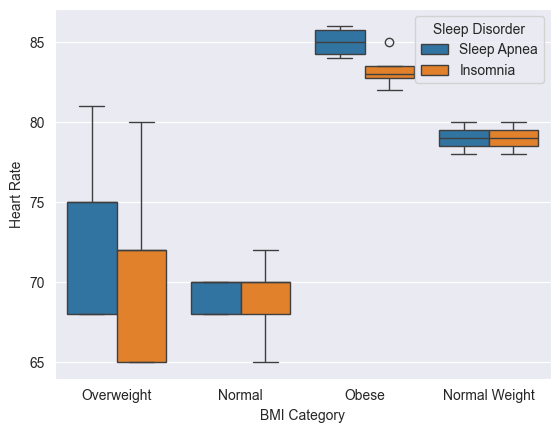

In [15]:
# 박스플롯 그리기
sns.boxplot(data=df, x='BMI Category', y='Heart Rate', hue='Sleep Disorder')
plt.show()
# BMI가 수면장애와 심장박동 수에 미치는 영향

## 06. 변수간 관계 시각화

## 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

In [16]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_code,Occupation_encoded
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.584229,0.269343
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.596358,0.231188
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,0.121579,-0.325775
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,0.291366,-0.278071
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,-0.001454,-0.103660
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,-0.396018,0.021123
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,-0.217105,0.043928
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.014509,-0.105877
Gender_code,0.584229,0.596358,0.121579,0.291366,-0.001454,-0.396018,-0.217105,0.014509,1.000000,0.219113
Occupation_encoded,0.269343,0.231188,-0.325775,-0.278071,-0.103660,0.021123,0.043928,-0.105877,0.219113,1.000000


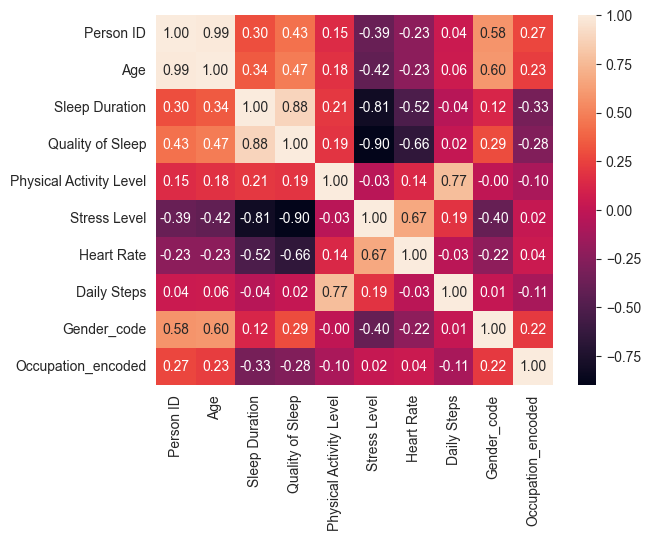

In [17]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [18]:
# 교차표
pd.crosstab(df['Age'], df['Sleep Duration'])

Sleep Duration,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,...,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5
Age,,,,,,,,,,,,,,,,,,,,,
27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,4,2,0,1,0,2,0,0,...,0,0,4,0,0,0,0,0,0,0
30,0,0,0,0,0,0,2,0,0,0,...,1,4,2,4,0,0,0,0,0,0
31,0,0,0,3,0,0,0,0,0,0,...,3,8,3,1,0,0,0,0,0,0
32,0,0,7,0,4,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
33,0,0,7,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# 두 변수간 교차분석
pivot_age_pclass = df.pivot_table(index='Age', columns='Gender', values='Sleep Duration')
pivot_disorder_pclass = df.pivot_table(index='Sleep Disorder', columns='Gender', values='Sleep Duration', aggfunc='mean')
display(pivot_age_pclass)
display(pivot_disorder_pclass)

Gender,Female,Male
Age,,
27,NaN,6.100000
28,NaN,6.020000
29,6.500000,6.700000
30,6.400000,7.781818
31,7.900000,7.417647
32,NaN,6.588235
33,6.200000,6.036364
34,5.800000,NaN
35,7.200000,7.218182


Gender,Female,Male
Sleep Disorder,,
Insomnia,6.633333,6.551220
Sleep Apnea,7.035821,7.009091


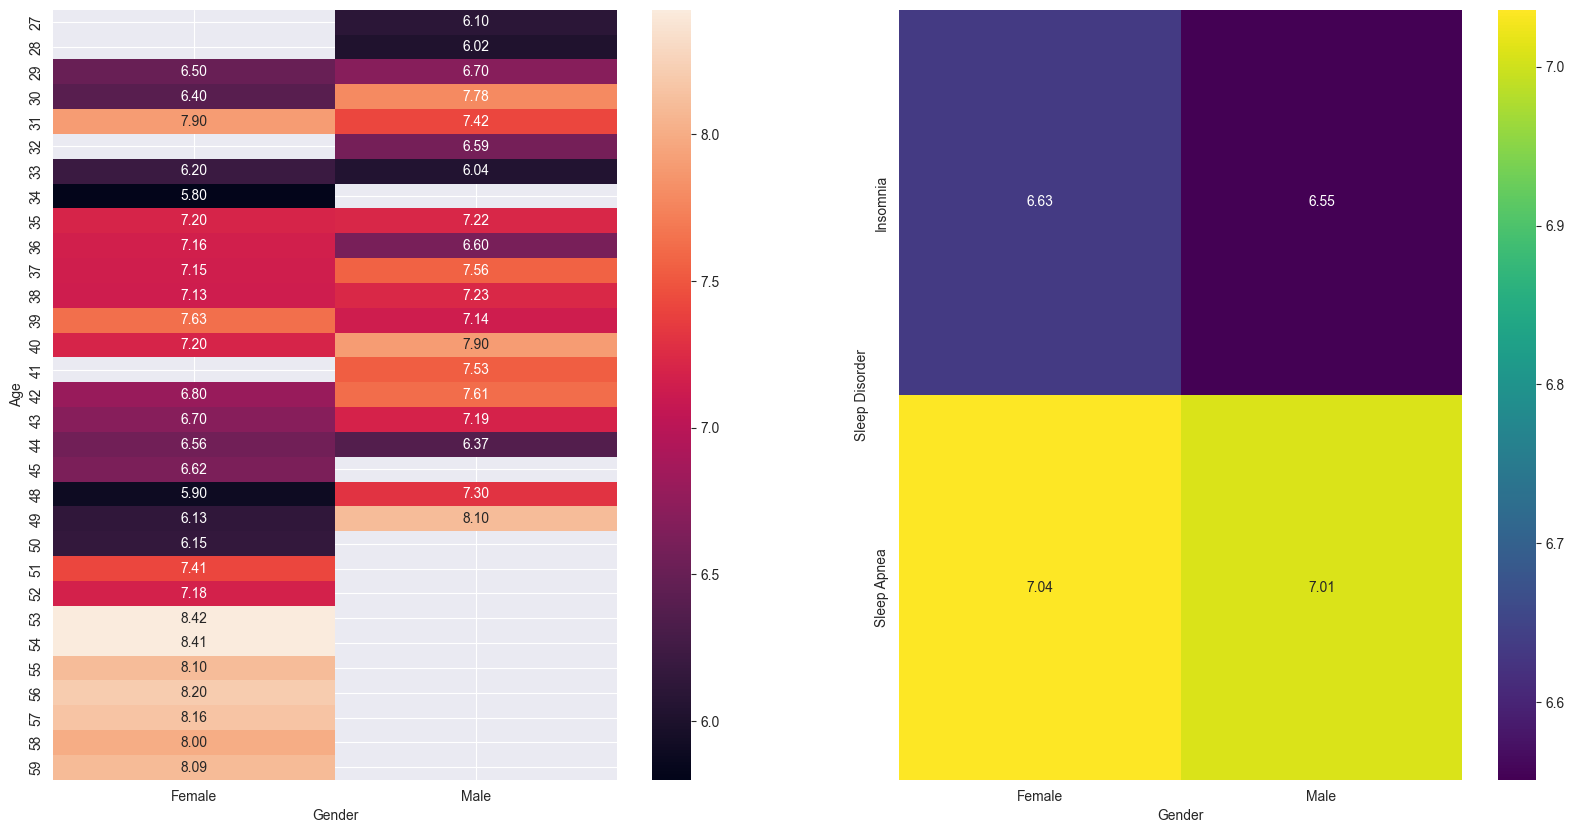

In [20]:
# 히트맵
_, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(pivot_age_pclass, annot=True, fmt='.2f', ax=ax[0])
sns.heatmap(pivot_disorder_pclass, annot=True, fmt='.2f', ax=ax[1], cmap='viridis')
plt.show()

## 08. 데이터전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

In [41]:
# 08. 데이터 전처리 (기존 코드에서 일부 가져오거나 새로 작성)
# 이전에 df_processed와 같이 전처리된 데이터프레임이 있다면 그것을 사용합니다.
# 여기서는 원본 df를 기준으로 전처리부터 다시 진행한다고 가정합니다.

df_fe = df.copy() # Feature Engineering을 위한 새 데이터프레임 복사

# Person ID 제거 (이미 이전 단계에서 했을 수 있음)
if 'Person ID' in df_fe.columns:
    df_fe.drop('Person ID', axis=1, inplace=True) # drop은 inplace=True를 사용해도 명확한 편입니다.
    print("'Person ID' 컬럼 제거 완료.")

# BMI Category 통일: 'Normal Weight' -> 'Normal'
# inplace=True 대신 직접 할당
df_fe['BMI Category'] = df_fe['BMI Category'].replace('Normal Weight', 'Normal')
print("'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'")

# Occupation 통일 (예: 'Salesperson' -> 'Sales Representative')
# inplace=True 대신 직접 할당
df_fe['Occupation'] = df_fe['Occupation'].replace('Salesperson', 'Sales Representative')
print("'Occupation' 값 통일 완료 (예시).")


# Sleep Disorder 결측치를 'None'으로 채우기 (EDA 결과에 따라 결정, 여기서는 일단 'None'으로 가정)
# inplace=True 대신 직접 할당 <--- 이 부분이 수정되었습니다.
df_fe['Sleep Disorder'] = df_fe['Sleep Disorder'].fillna('None')
print("'Sleep Disorder' 결측치를 'None'으로 채우기 완료.")


print("\n" + "="*50 + "\n")
print("초기 전처리 완료된 데이터 샘플:")
print(df_fe.head())
print("\n" + "="*50 + "\n")

'Person ID' 컬럼 제거 완료.
'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'
'Occupation' 값 통일 완료 (예시).
'Sleep Disorder' 결측치를 'None'으로 채우기 완료.


초기 전처리 완료된 데이터 샘플:
  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8

## 09. Feature Engineering


'Person ID' 컬럼 제거 완료.
'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'
## 09. Feature Engineering 시작 ##

--- 1. 혈압 관련 파생 변수 생성 ---
'Systolic_BP'와 'Diastolic_BP' 컬럼 생성 완료.
'MAP' (평균 동맥압) 컬럼 생성 완료.
'Pulse_Pressure' (맥압) 컬럼 생성 완료.
'BP_Category' (혈압 범주) 컬럼 생성 완료.
   Systolic_BP  Diastolic_BP     MAP  Pulse_Pressure BP_Category
0          126            83   97.33              43     고혈압 1단계
1          125            80   95.00              45     고혈압 1단계
2          125            80   95.00              45     고혈압 1단계
3          140            90  106.67              50     고혈압 2단계
4          140            90  106.67              50     고혈압 2단계


--- 2. 수면 효율 관련 파생 변수 생성 ---
'Sleep_Quality_per_Hour' 컬럼 생성 완료.
   Sleep Duration  Quality of Sleep  Sleep_Quality_per_Hour
0             6.1                 6                    0.98
1             6.2                 6                    0.97
2             6.2                 6                    0.97
3             5.9                 4      

C:\Users\isdjf\AppData\Local\Temp\ipykernel_11644\760438531.py:176: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\AppData\Local\Temp\ipykernel_11644\760438531.py:176: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\AppData\Local\Temp\ipykernel_11644\760438531.py:176: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\AppData\Local\Temp\ipykernel_11644\760438531.py:176: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\AppData\Local\Temp\ipykernel_11644\760438531.py:176: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\AppData\Local\Temp\ipykernel_11644\760438531.py:176: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) Arial.
  plt.tight_la

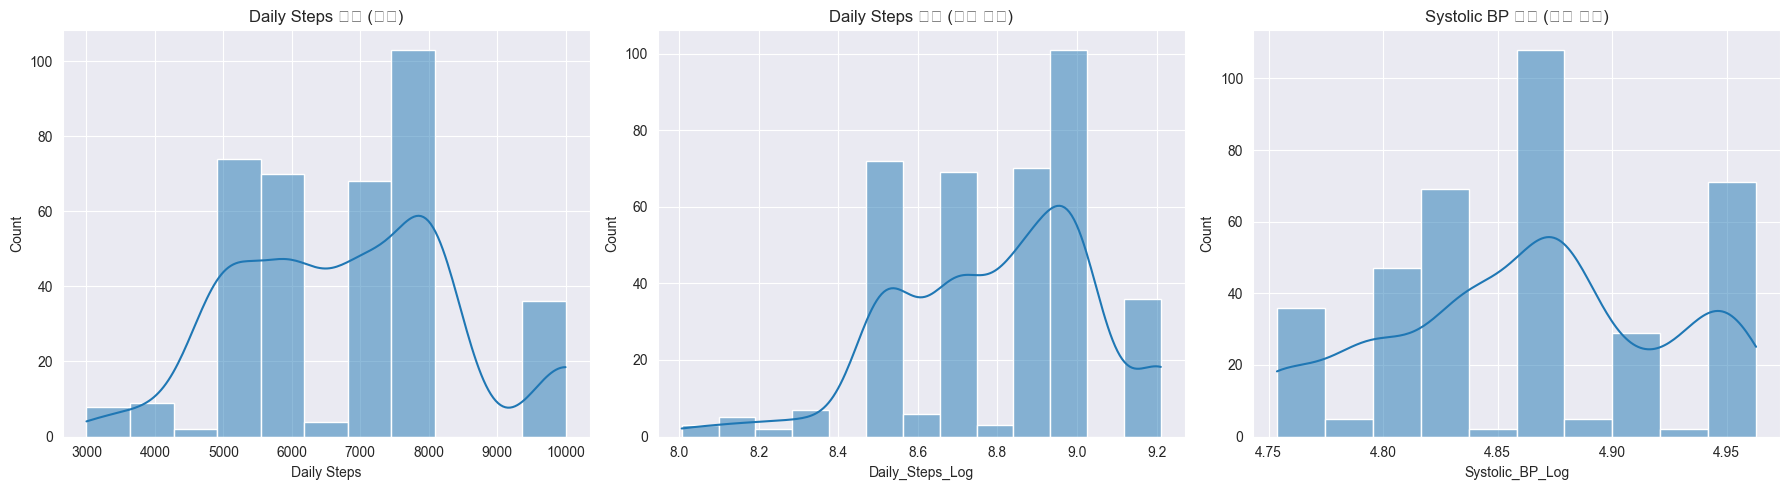



## Feature Engineering 완료 ##

최종 생성된 컬럼 목록:
Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Gender_code', 'Occupation_encoded',
       'Systolic_BP', 'Diastolic_BP', 'MAP', 'Pulse_Pressure', 'BP_Category',
       'Sleep_Quality_per_Hour', 'Quality_per_Stress', 'Activity_per_Stress',
       'Daily_Steps_Category', 'BMI_Encoded', 'Age_Group', 'Is_Medical_Worker',
       'Age_x_Stress', 'Sleep_x_Activity', 'Daily_Steps_Log',
       'Systolic_BP_Log', 'Diastolic_BP_Log'],
      dtype='object')

최종 데이터 샘플 (Feature Engineering 후):
  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Repre

In [45]:
# 09. Feature Engineering

df_fe = df.copy() # Feature Engineering을 위한 새 데이터프레임 복사 (항상 원본 df 사용)

# Person ID 제거 (만약 원본 df에 있다면)
if 'Person ID' in df_fe.columns:
    df_fe.drop('Person ID', axis=1, inplace=True)
    print("'Person ID' 컬럼 제거 완료.")

# BMI Category 통일 (만약 원본 df에 'Normal Weight'가 있다면)
if 'Normal Weight' in df_fe['BMI Category'].unique():
    df_fe['BMI Category'] = df_fe['BMI Category'].replace('Normal Weight', 'Normal')
    print("'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'")


print("## 09. Feature Engineering 시작 ##\n")

# 1. 혈압(Blood Pressure) 수치화 및 범주화
print("--- 1. 혈압 관련 파생 변수 생성 ---")
# Systolic (수축기) BP와 Diastolic (이완기) BP 분리
bp_split = df_fe['Blood Pressure'].str.split('/', expand=True)
df_fe['Systolic_BP'] = pd.to_numeric(bp_split[0])
df_fe['Diastolic_BP'] = pd.to_numeric(bp_split[1])
df_fe.drop('Blood Pressure', axis=1, inplace=True) # 원본 혈압 컬럼 제거
print("'Systolic_BP'와 'Diastolic_BP' 컬럼 생성 완료.")

# 평균 동맥압 (MAP) 계산
df_fe['MAP'] = df_fe['Diastolic_BP'] + (df_fe['Systolic_BP'] - df_fe['Diastolic_BP']) / 3
df_fe['MAP'] = df_fe['MAP'].round(2)
print("'MAP' (평균 동맥압) 컬럼 생성 완료.")

# 맥압 (Pulse Pressure) 계산
df_fe['Pulse_Pressure'] = df_fe['Systolic_BP'] - df_fe['Diastolic_BP']
print("'Pulse_Pressure' (맥압) 컬럼 생성 완료.")

# 혈압 범주 생성 (미국 심장 협회 기준 단순화 예시)
def categorize_bp(row):
    systolic = row['Systolic_BP']
    diastolic = row['Diastolic_BP']
    if systolic < 120 and diastolic < 80:
        return '정상'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return '주의 혈압'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return '고혈압 1단계'
    elif systolic >= 140 or diastolic >= 90:
        return '고혈압 2단계'
    else:
        return '분류 불가' # 혹시 모를 예외 처리

df_fe['BP_Category'] = df_fe.apply(categorize_bp, axis=1)
print("'BP_Category' (혈압 범주) 컬럼 생성 완료.")
print(df_fe[['Systolic_BP', 'Diastolic_BP', 'MAP', 'Pulse_Pressure', 'BP_Category']].head())
print("\n" + "="*50 + "\n")


# 2. 수면 효율 관련 지표
print("--- 2. 수면 효율 관련 파생 변수 생성 ---")
# 수면 시간 대비 수면의 질 (Quality of Sleep / Sleep Duration)
# Sleep Duration이 0인 경우를 방지하기 위해 작은 값(epsilon)을 더하거나, 0인 경우를 처리
epsilon = 1e-6
df_fe['Sleep_Quality_per_Hour'] = df_fe['Quality of Sleep'] / (df_fe['Sleep Duration'] + epsilon)
df_fe['Sleep_Quality_per_Hour'] = df_fe['Sleep_Quality_per_Hour'].round(2)
print("'Sleep_Quality_per_Hour' 컬럼 생성 완료.")
print(df_fe[['Sleep Duration', 'Quality of Sleep', 'Sleep_Quality_per_Hour']].head())
print("\n" + "="*50 + "\n")


# 3. 스트레스 및 활동 관련 지표
print("--- 3. 스트레스 및 활동 관련 파생 변수 생성 ---")
# 스트레스 수준 대비 수면의 질 (Quality of Sleep / Stress Level)
# Stress Level이 0인 경우 방지
df_fe['Quality_per_Stress'] = df_fe['Quality of Sleep'] / (df_fe['Stress Level'] + epsilon)
df_fe['Quality_per_Stress'] = df_fe['Quality_per_Stress'].round(2)
print("'Quality_per_Stress' 컬럼 생성 완료.")

# 신체 활동 수준 대비 스트레스 수준 (Physical Activity Level / Stress Level)
df_fe['Activity_per_Stress'] = df_fe['Physical Activity Level'] / (df_fe['Stress Level'] + epsilon)
df_fe['Activity_per_Stress'] = df_fe['Activity_per_Stress'].round(2)
print("'Activity_per_Stress' 컬럼 생성 완료.")

# 일일 걸음 수 범주화
step_bins = [0, 4000, 7000, 10000, float('inf')]
step_labels = ['적음 (0-4k)', '보통 (4k-7k)', '활동적 (7k-10k)', '매우 활동적 (10k+)']
df_fe['Daily_Steps_Category'] = pd.cut(df_fe['Daily Steps'], bins=step_bins, labels=step_labels, right=False)
print("'Daily_Steps_Category' 컬럼 생성 완료.")
print(df_fe[['Stress Level', 'Quality of Sleep', 'Quality_per_Stress', 'Physical Activity Level', 'Activity_per_Stress', 'Daily Steps', 'Daily_Steps_Category']].head())
print("\n" + "="*50 + "\n")


# 4. BMI Category 수치형 변환
print("--- 4. BMI Category 수치형 변환 ---")
# Label Encoding 또는 Ordinal Encoding 방식 사용 가능
# 여기서는 분석 편의상 직접 매핑
bmi_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
df_fe['BMI_Encoded'] = df_fe['BMI Category'].map(bmi_mapping)
# 결측치가 생길 수 있으므로 확인 (만약 'Normal Weight' 외 다른 값이 있다면)
# df_fe['BMI_Encoded'].fillna(-1, inplace=True) # 예시: 결측치는 -1로
print("'BMI_Encoded' 컬럼 생성 완료.")
print(df_fe[['BMI Category', 'BMI_Encoded']].head())
print(df_fe['BMI_Encoded'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")


# 5. 연령대 범주화
print("--- 5. 연령대 범주화 ---")
age_bins = [0, 30, 40, 50, 60, float('inf')]
age_labels = ['20대이하', '30대', '40대', '50대', '60대이상'] # 데이터의 Age 분포(27~59) 고려
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=age_bins, labels=age_labels, right=False)
print("'Age_Group' 컬럼 생성 완료.")
print(df_fe[['Age', 'Age_Group']].head())
print(df_fe['Age_Group'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")


# 6. 직업군 그룹화 (예시: 의료계 종사자 여부)
print("--- 6. 직업군 그룹화 ---")
medical_occupations = ['Doctor', 'Nurse']
df_fe['Is_Medical_Worker'] = df_fe['Occupation'].apply(lambda x: 1 if x in medical_occupations else 0)
print("'Is_Medical_Worker' (의료계 종사자 여부) 컬럼 생성 완료.")
print(df_fe[['Occupation', 'Is_Medical_Worker']].head(10))
print(df_fe['Is_Medical_Worker'].value_counts())
print("\n" + "="*50 + "\n")

# 7. 상호작용 항 (Interaction Terms) - 예시
print("--- 7. 상호작용 항 생성 (예시) ---")
# 나이와 스트레스 수준의 상호작용
df_fe['Age_x_Stress'] = df_fe['Age'] * df_fe['Stress Level']
print("'Age_x_Stress' 컬럼 생성 완료.")

# 수면 시간과 신체 활동 수준의 상호작용
df_fe['Sleep_x_Activity'] = df_fe['Sleep Duration'] * df_fe['Physical Activity Level']
print("'Sleep_x_Activity' 컬럼 생성 완료.")
print(df_fe[['Age', 'Stress Level', 'Age_x_Stress', 'Sleep Duration', 'Physical Activity Level', 'Sleep_x_Activity']].head())
print("\n" + "="*50 + "\n")


# 8. 정규화/스케일링 (예시: 로그 변환)
print("--- 8. 로그 변환 (예시) ---")

# Daily Steps 로그 변환
if 'Daily Steps' in df_fe.columns:
    df_fe['Daily_Steps_Log'] = np.log1p(df_fe['Daily Steps'])
    print("'Daily_Steps_Log' 컬럼 생성 완료.")
    print(df_fe[['Daily Steps', 'Daily_Steps_Log']].head())

    # Systolic_BP 로그 변환
    if 'Systolic_BP' in df_fe.columns:
        df_fe['Systolic_BP_Log'] = np.log1p(df_fe['Systolic_BP'])
        print("'Systolic_BP_Log' 컬럼 생성 완료.")
        print(df_fe[['Systolic_BP', 'Systolic_BP_Log']].head())
    else:
        print("'Systolic_BP' 컬럼이 존재하지 않아 로그 변환을 수행할 수 없습니다.")

    # Diastolic_BP 로그 변환
    if 'Diastolic_BP' in df_fe.columns:
        df_fe['Diastolic_BP_Log'] = np.log1p(df_fe['Diastolic_BP'])
        print("'Diastolic_BP_Log' 컬럼 생성 완료.")
        print(df_fe[['Diastolic_BP', 'Diastolic_BP_Log']].head())
    else:
        print("'Diastolic_BP' 컬럼이 존재하지 않아 로그 변환을 수행할 수 없습니다.")

    # 시각화
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(df_fe['Daily Steps'], kde=True)
    plt.title('Daily Steps 분포 (원본)')
    plt.subplot(1, 3, 2)
    if 'Daily_Steps_Log' in df_fe.columns:
        sns.histplot(df_fe['Daily_Steps_Log'], kde=True)
        plt.title('Daily Steps 분포 (로그 변환)')
    if 'Systolic_BP_Log' in df_fe.columns:
        plt.subplot(1, 3, 3)
        sns.histplot(df_fe['Systolic_BP_Log'], kde=True)
        plt.title('Systolic BP 분포 (로그 변환)')
    plt.tight_layout()
    plt.show()

else:
    print("'Daily Steps' 컬럼이 없어 로그 변환 및 관련 시각화를 생략합니다.")


print("\n" + "="*50 + "\n")


print("## Feature Engineering 완료 ##\n")
print("최종 생성된 컬럼 목록:")
print(df_fe.columns)
print("\n최종 데이터 샘플 (Feature Engineering 후):")
print(df_fe.head())
print("\n최종 데이터 정보 (Feature Engineering 후):")
df_fe.info()